In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv("/content/drive/MyDrive/framingham.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [7]:
#check for missing values
df.isna().value_counts().sum()

4238

In [9]:
df.isna().sum()

,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


In [12]:
#There are some missing values so first deal with them
#so we are using simple imputer here
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy="mean")

In [53]:
ndf = si.fit_transform(df)
ndf = pd.DataFrame(ndf,columns= df.columns)

In [54]:
ndf.isna().sum()

,0
male,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


In [ ]:
#so all null values are filled with mean of there respective column


**Exploratory Data Analysis**

Let's visualize some of the key features to understand their distributions and relationships.

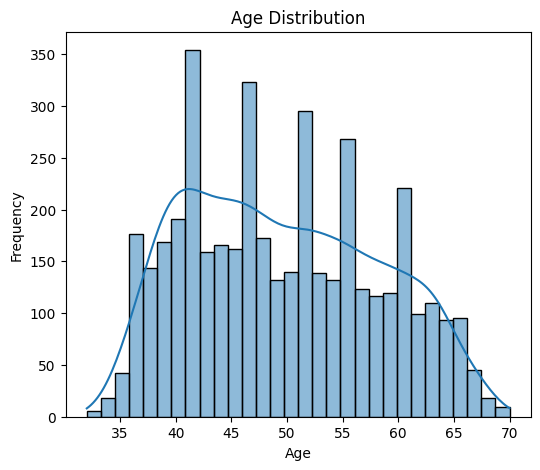

In [56]:
#age distribution
plt.figure(figsize=(6,5))
sns.histplot(ndf["age"],bins=30,kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [ ]:
#from above histogram ,we can say that our data is normally distributed

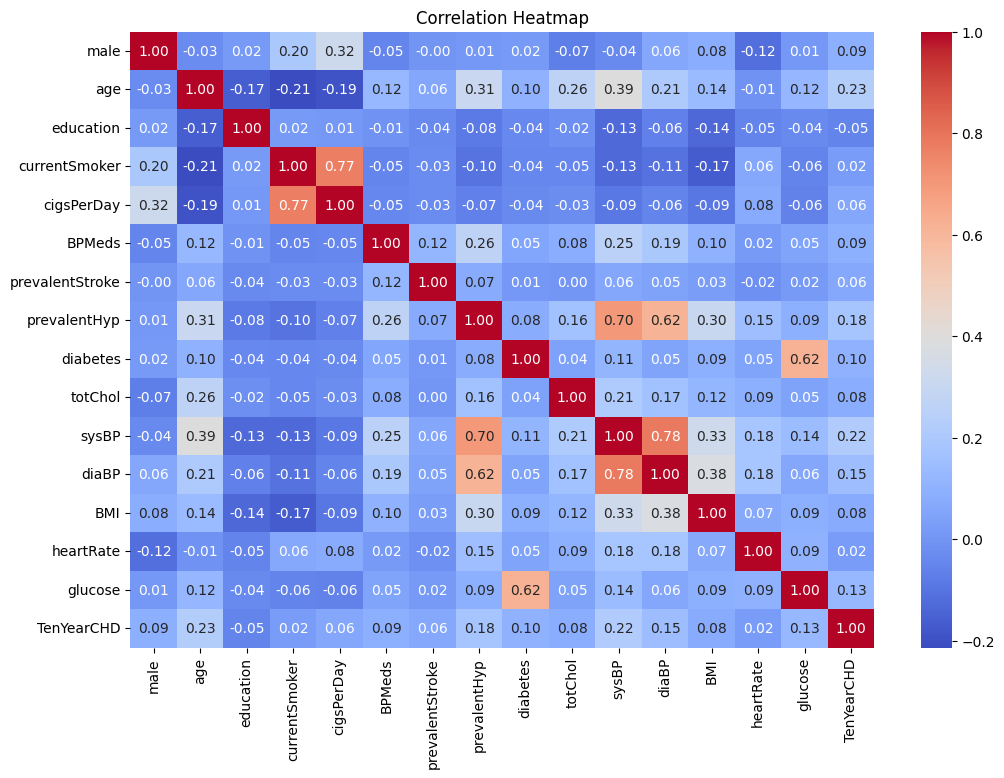

In [22]:
#now check the correlation graph for numeric features
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

****We will use the Logistic Regression to predict the probability of developing heart disease within ten years ****

In [47]:
#now scale the values using standardscaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [64]:
x =ndf[['currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentHyp', 'totChol', 'BMI', 'heartRate', 'glucose']]
y = ndf["TenYearCHD"]

In [62]:
sc.fit(x[['cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose']])
x[['cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose']]=sc.transform(x[['cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose']])

<ipython-input-62-82df768ee119>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[['cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose']]=sc.transform(x[['cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose']])


In [63]:
x.head()

,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,totChol,BMI,heartRate,glucose
0,0.0,-0.757974,0.0,0.0,-0.941346,0.286943,0.342744,-0.217517
1,0.0,-0.757974,0.0,0.0,0.299595,0.719325,1.590275,-0.261311
2,1.0,0.925835,0.0,0.0,0.186782,-0.113502,-0.073099,-0.524078
3,1.0,1.767740,0.0,1.0,-0.264469,0.682474,-0.904786,0.921141
4,1.0,1.178407,0.0,0.0,1.089284,-0.663807,0.758588,0.132840


**Build a model**

In [60]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [65]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [66]:
model.fit(x_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [67]:
y_pred=model.predict(x_test)


**Model Evaluation**

In [72]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report


In [69]:
print('Accuracy Score: ', accuracy_score(y_test, y_pred))


Accuracy Score:  0.8431603773584906


In [73]:
print(confusion_matrix(y_test,y_pred))

[[713   2]
 [131   2]]


In [75]:
print( classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91       715
         1.0       0.50      0.02      0.03       133

    accuracy                           0.84       848
   macro avg       0.67      0.51      0.47       848
weighted avg       0.79      0.84      0.78       848



**Conclusion:**
so from classification report we conclude that we get 84% accuracy which is quite good ...also model has 84% precision score for No Coronary Heart Disease and recall=1.00